##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)     |     [Neste >](8%20-%20Git,%20IDE'er%20og%20et%20lite%20spill.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 7 - løkker og simulering </span>  

Løkker er noe av det mest brukte verktøyet for en programmerer. EN løkke er en programkode som repeteres. Det finnes i hovedsak to typer løkker i Python: `while`-løkker og `for`-løkker. En `while` lar løkken løpe til en betingelse er oppfylt, mens `for` løkken repeterer koden for alle elementene i en liste eller annen *iterativ datastruktur*. La oss se på noen eksempler:

# For-løkker

Her er eksempel på en `for`-løkke som deriverer alle utrykkene i listen `expressions`:

#### Eksempel 1:

In [1]:
from IPython.display import Markdown, display
import sympy as sp

x,y=sp.symbols("x y")

expressions=[
    sp.root(x,y),
    x**2+5*sp.exp(x),
    x*sp.ln(x)
]

for i in expressions:
    display(Markdown(f"Den deriverte av ${sp.latex(i)}$ er ${sp.latex(sp.diff(i,x))}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

Eller du kan bare gjøre en enkel iterasjon for heltall fra en startverdi til en sluttverdi:

#### Eksempel 2:

In [6]:
for i in range(5,8):
    print(i)
    
for i in range(3):
    print(i)
list(range(5,8))

5
6
7
0
1
2


[5, 6, 7]

`range(5,8)` er i praksisk listen `[5, 6, 7]`

Du kan også "pakke ut" elementer, dersom hvert element i `for`-setningen har et bestemt antall under-elementer. La oss først lage en liste som inneholder en ´tuple´ med uttrykkene i `expressions` over, og den deriverte av disse:

#### Eksempel 3:

In [3]:
#using list comprehension to generate a list with expression,derivative tuples:
expressions_w_derivatives=[ (i, sp.diff(i,x)) for i in expressions ]
expressions_w_derivatives

[(x**(1/y), x**(1/y)/(x*y)),
 (x**2 + 5*exp(x), 2*x + 5*exp(x)),
 (x*log(x), log(x) + 1)]

Vi kan nå kjøre en for-løkke som forventer at hvert element i listen er en *iterabel* (for eksempel liste eller tuple) med to elementer:

#### Eksempel 4

In [4]:

for function,derivative in expressions_w_derivatives:
    display(Markdown(f"Den deriverte av ${sp.latex(function)}$ er ${sp.latex(derivative)}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

# While-løkker

En `while`-løkke er en løkke som fortsetter inntil en betingelse er oppfylt. I eksemplet under ser vi at det genereres nye tilfeldige aksjekurser så lenge kursen er under 125 kroner . 

Aksjen skal bevege seg tilfeldig. For å få til det bruker vi funksjonen `rand` fra `random`-modulen i numpy.  `np.random.rand()` gir et tilfeldig tall mellom null og én, så ved å multiplisere `(np.random.rand()-0.5)` med 40, får vi et tilfeldig tall mellom -20 og 20. 

#### Eksempel 5:

In [10]:
import numpy as np

dy,y=0,100

while y<125:  
    y+=dy
    dy=40*(np.random.rand()-0.5) 
    print(y)

100
92.7640276983727
93.82781004142633
107.09865158007074
119.09008690539238
107.72106323868806
105.39781618352283
104.1860351965741
92.07037580756295
102.34634828170836
91.55444893630857
93.68692925699115
112.37678731798464
128.14019828934912


Legg spesielt merke til `y+=dy` over. Denne operasjonen legger `dy` til `y`, og tilsvarer altså `y=y+dy`. De aller fleste programmeringsspråk støtter `+=`-operatoren.  

Dette er forøvrig standard måte å moddelere aksjekursbevegelse innen økonomifaget.

Legg også merke til at vi kan sette flere variabler samtidig, ved å skille både variablene og verdiene med like mange kommaer, `dy,y=0,100`

# Simulering

Løkker kan brukes til mye, så la oss se på et eksempel på simulering. Simulering vil si å trekke tilfeldige tall for å se hvordan en modell opptrer under usikkerhet. La oss for eksempel tenke oss en aksje som starter på hundre kroner, og så beveger seg tilfeldig. Vi ser på aksjen hvert sjette minutt, eller én tidel (0.1) av én time. Tiden øker dermed med 0.1 i hver periode. 

For å tegne opp stien til aksjekursen, lager vi først lister for x- og y-verdiene, og så legger vi til elementer i hver av listene med `append`-funksjonen til listeobjektene, før listen plottes som en graf. Kjør koden flere ganger, for å se ulike simuleringer. 

#### Eksempel 6:

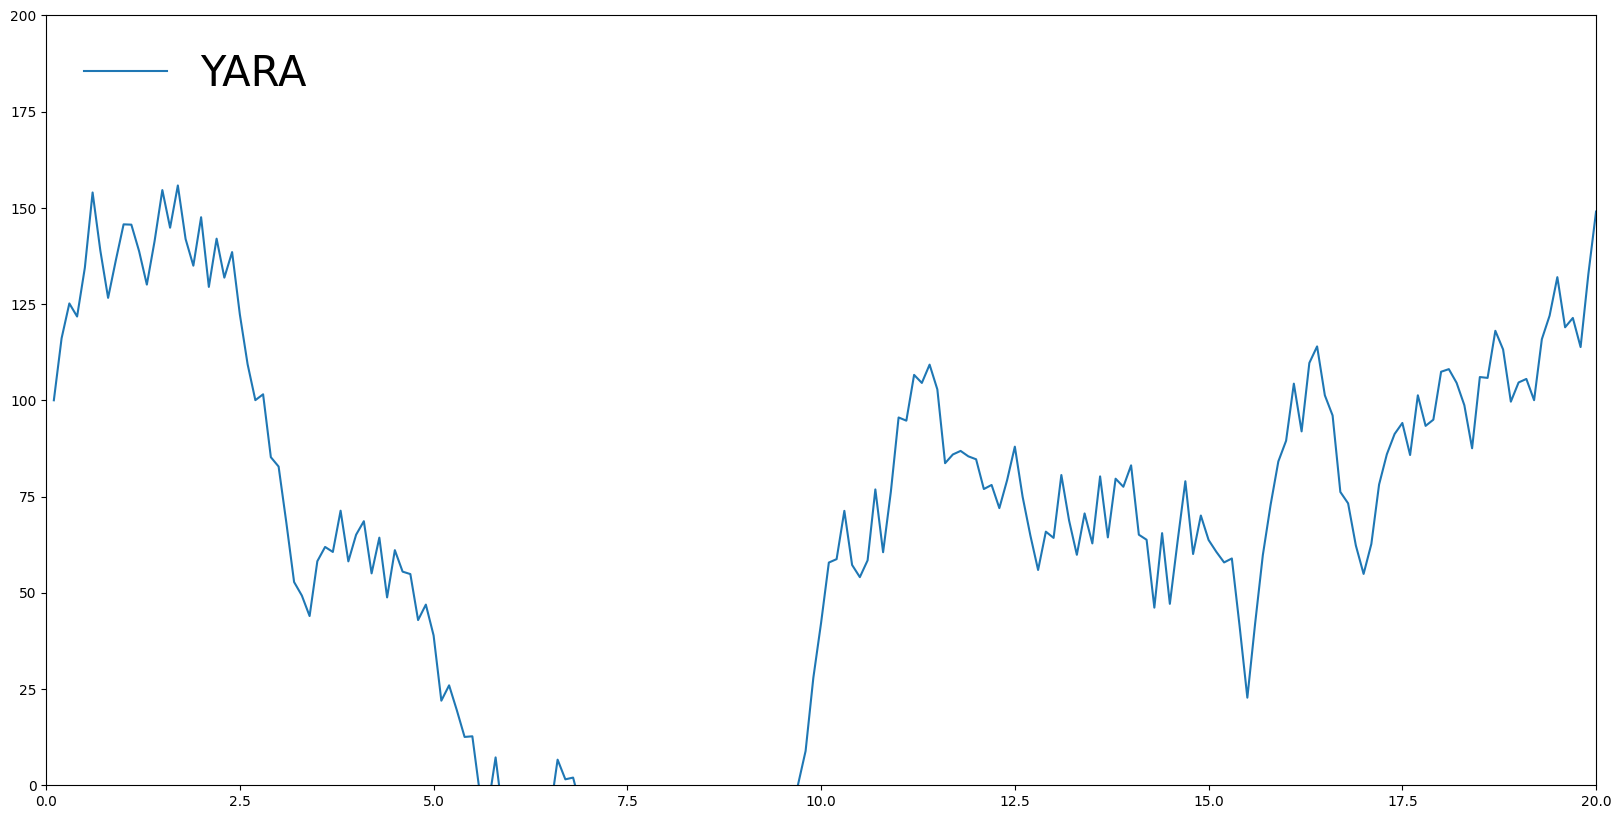

In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0,200])
ax.set_xlim([0,20])

x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
    
ax.plot(xpath,ypath,label='YARA')
ax.legend(loc='upper left',frameon=False,fontsize=30)

    


# Dynamisk plott

Om vi ønsker å formidle kunnskap, er det av og til nyttig med dynamiske plott. Altså plott som endrer seg mens du ser på dem. Vi kan gjøre det ved å rykke inn de to siste setningene i Eksempel 19 over. Det er disse setningene som lager plottet. Ved å rykke dem inn, plottes figuren i hver iterasjon. 

I utgangspunktet vil du da få 25 figurer etter hverandre. For at figuren skal tegnes i samme figur hver gang, må vi

1. Ekspisit be python om å vise den med `display(fig)`
2. Slette figuren i figurobjektet `ax` med `ax.cla()` og i visningen (`clear_output(wait = True)`).
3. Sette akseintervallene på nytt. 

Det kan du få til ved å sette følgende setninger inn i løkken:

#### Eksempel 7:

In [21]:
#displaying and deleting last plot
display(fig)
ax.cla()
clear_output(wait = True)

#Fixing axes
ax.set_ylim([0,200])
ax.set_xlim([0,20])

(0.0, 20.0)

I tillegg kan vi lage en markør ved å tegne en rund elipse i x,y, og legge til teks til den. Det skjer om du limer inn denne i løkken:

#### Eksempel 8

In [28]:
#making dot:
c=Ellipse((x, y), 0.25,5, color='r')
ax.add_patch(c)
ax.text(x+0.1,y+3,f'NOK {np.round(y,1)}')

Text(25.100000000000087, 13.244829263245325, 'NOK 10.2')

Det bør nevenes at dette ikke er den anbefalte måte å lage grafiske animasjoner. Det går tregt og hakker. Om en skal gjøre det på en litt mer profesjonell måte, er det hovedsakelig to alternativer:

* bruke python-pakken ´tkinter´, som er den vanligste pakken for å lage python-programmer med grafisk brukergrensesnitt
* javascript på en nettside

#### Eksempel 9:

## Fangenes dilemma - dynamisk repetert spill

"Fangenes dilemma" er et velkjent spill innen samfunnsøkonomi. To fanger avhøres om en forbrytelse de har begått sammen. Hver av dem kan enten velge å forråde den andre ved å sladre ("T" for "tyste/traitor") eller være lojal og taus ("L" for "lojal/loyal"). Holder begge tett, blir det en lav straff for begge. Sladrer begge blir det en høyere straff. Dersom bare én sladrer, slipper den som sladrer fri, mens den som holder tett får en streng straff.

            Spiller B
<div style="display: flex;">
    
  <div style="margin-right: 20px;">Spiller A</div>
  <div>

|  | Tyste | Lojal | 
|----------|----------|----------|
| Tyste | 1,1 | 5,0 |
|Lojal | 0,5 | 3,3 |


  </div>
</div>
<br><br>
Ser du hva som er lurt å gjøre for spillerne? Dette kan operasjonaliseres i følgende gevinstfunksjon:


#### Eksempel 10:

In [31]:
def game_payoff(action_a, action_b):
    if action_a == "L" and action_b == "L":
        return 3, 3
    elif action_a == "L" and action_b == "T":
        return 0, 5
    elif action_a == "T" and action_b == "L":
        return 5, 0
    else:
        return 1, 1

Du kan se på poengene som antall år de får i strafferabatt i forhold til straffen for en som holder tett, når den andre forråder. 

Vi kan nå lage en adferdsfunksjon for fangene. Fangene får ikke vite hva motstanderen gjør i øyeblikket, men vi skal se på et spill som gjentas flere ganger. Spillerne får da vite hva motstanderen gjorde forrige periode. Handlingen til motstanderen forrige periode, blir da argumentet i adferdsfunksjonen, eller strategien. Vi definerer en egen funksjon for hver spiller, men de er foreløpig identiske. I øvingsoppgaven kan du lage ulike funksjoner for spillerne om du vil.

#### Eksempel 11

In [32]:
def strategy_player_a(action_b):
    #punish if the other is a traitor, else be loyal
    if action_b == "T":
        return "T"
    else:
        return "L"
    
def strategy_player_b(action_a):
    #punish if the other is a traitor, else be loyal
    if action_a == "T":
        return "T"
    else:
        return "L"


Dersom spillet kun spilles én gang, er den åpenbart beste strategien for begge å tyste. Om de spiller spillet gjentatte ganger, er imidlertid ikke det like klart. Vi kan nå se hvordan dette vil spille seg ut, gitt payoffen og strategien i et gjentatt spill, der fangene spiller mot hverandre et gitt antall ganger:

#### Eksempel 12

In [27]:
num_rounds = 10

#Defining history and initial response
actions_a = ["T"]
actions_b = ["T"]

scores_a = 0
scores_b = 0

#Iterating over periods
for i in range(1, num_rounds):
    #collecting responses and appending to history
    next_a = strategy_player_a(actions_b[i-1])
    next_b = strategy_player_b(actions_a[i-1])
    
    actions_a.append(next_a)
    actions_b.append(next_b)
    
    #calculating score
    score_a, score_b = game_payoff(next_a, next_b)
    scores_a += score_a
    scores_b += score_b


print("Actions A:", actions_a)
print("Actions B:", actions_b)
print("Total Score A:", scores_a)
print("Total Score B:", scores_b)

Actions A: ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
Actions B: ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
Total Score A: 9
Total Score B: 9


Målet er for hver å få lavest mulig score. Hva er den beste strategien for spillerne?

## Nummerisk optimering

Vi har før regnet ut optimalt kvantum ved å bruke Sympy til å regne ut den deriverte, sette lik null og løse. Av og til er det vanskelig å regne ut det optimale. Da går det an å regneut objektfunksjonen (det vi ønsker å maksimere) for mange ulike verdier, og velge det som gir høyest resultat. 

Vi skal her se et eksempel på det, men med en objektfunksjon som egentlig er enkelt å regne ut maksimum av analytisk med Sympy. Du kan da sjekke om det nummeriske resultatet er korrekt ved å regne ut i Sympy (det er en av øvningsoppgavene). 

Som objektfunksjon bruker vi fortjenesten til en bedrift som selger Q varer til pris p. Bedriftens kostnad per enhet er C

#### Eksempel 13:

In [11]:
def profit(p, C):
    """Beregner profitt gitt pris p og kostnad per enhet C."""
    Q = demand(p)
    return p * Q - C * Q

Q bestemmes av en etterspørselsfunksjon. 

#### Eksempel 14:

In [12]:
def demand(p):
    """Returnerer antall enheter solgt gitt en pris p."""
    return 100 - p

Vi kan nå finne optimum nummerisk:

#### Eksempel 15

In [13]:
import numpy as np

def find_optimal_price(start, end, C):
    """Finding optimal price in the range start-end"""
    max_profit = float('-inf')
    optimal_price = None
    n_samples = 1000
    
    #iterating over the price range
    for p in np.linspace(start, end, n_samples):
        current_profit = profit(p, C)
        if current_profit > max_profit:
            #if the profit exeeds the current profit, then store the new profit and price
            max_profit = current_profit
            optimal_price = p

    return optimal_price, max_profit


cost = 5
start_price = 0
end_price = 100

optimal_price, max_profit = find_optimal_price(0, 100, cost)

print(f"Optimal pris: {optimal_price}")
print(f"Maksimal profitt ved optimal pris: {max_profit}")

Optimal pris: 52.452452452452455
Maksimal profitt ved optimal pris: 2256.247739230722


## "Monte Carlo"-simulering

Fremtiden er usikker, en deterministisk modell som over tar ikke hensyn til det. En "Monte Carlo"-simulering betyr å trekke tilfeldige tall fra en sannsynlighetsfordeling, og bruke det i beregningen. En vil da kunne få et anslag på usikkerheten i den endelige beregningen. 

I dette eksemplet regnes inntekten etter 30 år ut (eller så lenge du spesifiserer). Inntekten hvert år er imidlertid avhengig av inntekten i fjor (for eksempel fordi man investerer noe av inntekten). 

Vi starter med å definere en funksjon som regner ut inntekten, basert på forrige års inntekt og et tilfeldig bidrag:

#### Eksempel 16:

In [14]:
import numpy as np

def calc_income(last_year_income, growth_rate, volatility):
    
    random_growth = np.random.normal(0, volatility)
    growth =  growth_rate + random_growth
    
    income = last_year_income * (1 + growth)
    
    return income

# regner ut med en halv million som fjorårets inntekt, 5% forventet inntektsøkning og 2% usikkerhet

calc_income(500000, 0.05, 0.02)

533433.1498755204

Så lager vi en funksjon som lager en "inntektssti" (income path) for et gitt antall års inntekt. Dette kalles en "sti"/"path" fordi dagens inntekt er avhengig av gårsdagen. Dagens situasjon er altså avhengig av hvilken sti inntekten har fulgt i alle tidligere år. 

#### Eksempel 17

In [15]:
def income_path(years, initial_income, growth_rate, volatility):
    
    incomes = [initial_income]
    
    #simulating a single income path:
    for year in range(years-1):

        #calculating income:
        income = calc_income(incomes[-1], growth_rate, volatility)

        #adding income for year to the path
        incomes.append(income)
        
    return incomes

#regner ut for fem år:

income_path(5,500000, 0.05, 0.02)

[500000,
 506168.7941812706,
 535258.7582826338,
 564758.1719742338,
 566393.5674357883]

Vi kan nå lage en funksjon som simulerer et gitt antall intektsstier gitt ved `num_simulations`:

#### Eksempel 18:

In [16]:
import pandas as pd

def simulate_income(years, initial_income, growth_rate, volatility, num_simulations):
    """Returns a 2D-array with simulated income for each year."""
    all_incomes = []
    for _ in range(num_simulations):
        #adding the path to all_incomes
        incomes = income_path(years, initial_income, growth_rate, volatility)
        all_incomes.append(incomes)
        
    return np.array(all_incomes)

#Setter inn i pandas DataFrame for å få en finere tabell

pd.DataFrame(  simulate_income(5, 500000, 0.05, 0.02, 3)
            )

,0,1,2,3,4
0,500000.0,540576.123105,583394.434495,597057.526074,639534.378887
1,500000.0,498980.102373,520177.467079,546327.340384,562340.864710
2,500000.0,523886.294686,550140.566096,572966.722461,607913.955354


Vi kan nå plotte fordelingen, for å få et inntrykk av fordelingen til inntekten i avslutningsåret:

#### Eksempel 19:

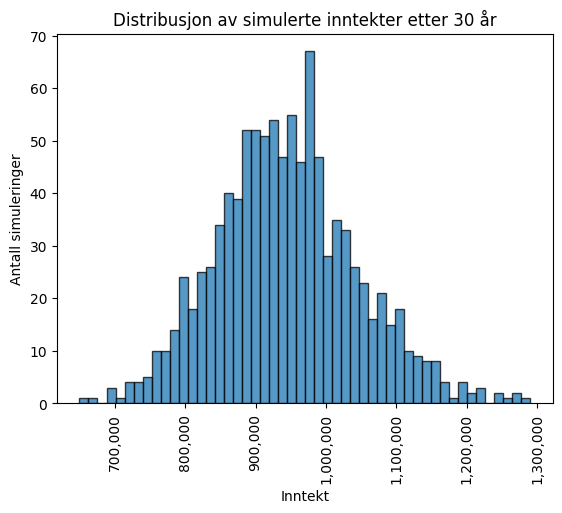

In [17]:
import matplotlib.pyplot as plt

#parameters
initial_income = 400000
growth_rate = 0.03
volatility = 0.02
years = 30
num_simulations = 1000

simulated_incomes = simulate_income(years, initial_income, growth_rate, volatility, num_simulations)

# plotting the final income
final_year_incomes = simulated_incomes[:, -1]

plt.hist(final_year_incomes, bins=50, edgecolor='black', alpha=0.75)
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xticks(rotation=90)
plt.title("Distribusjon av simulerte inntekter etter 30 år")
plt.xlabel("Inntekt")
plt.ylabel("Antall simuleringer")
plt.show()

# Oppgaver

1. Om du kjører koden i Eksempel 18 noen ganger vil du oppdage et problem. Aksjekursen kan bli negativ. Dette kan unngås ved å plotte *eksponenenten* av prosessen, i stedet. Dette kan du få til på følgende måte 
    1. Omdøp `y` i `y+= dy` til `lny`, og `x,y,dy=0,100,0` til `x,lny,dy=0,0,0`
    2. Eksponenten liker ikke store tall som argument, så fjern `40*` fra definisjonen av `dy` inne i while-løkken.
    3. definer en ny `y`som settes lik hundre ganger eksponenten til `lny`. Bruk `np.exp()`-funksjonen til numpy. 
    

2. I simuleringen du nå har laget over, lag intervallet for aksjekursen dynamisk, slik at slik at største aksjekurs alltid er minst ti prosent mer enn den simulerte kursen.

3. Fangenes dilemma:
   1. Lag en strategi for hver spiller der spillerne antar at motstanderen vil repetere forrige trekk, og finn den beste responsen gitt denne antakelsen. 
   2. Hva skal til for å få dem til å samarbeide, om de gjør denne antakelsen?
   3. Programmere strategien til hver spiller i én funksjon i stedet for to. 

4. Finn optimal pris i Eksemplene 11-13 analytisk, i stedet for nummerisk. Finn både for enhetskostnadene som er kjent (et konkret tall) og ukjent (C), og sammenlign resultatet med det nummeriske svaret

5. Lag en funksjon som regner ut optimal pris analytisk

6. Lag en "Monte Carlo"-simulering der enhetskostnadene er usikre, og plott et stolpediagram for optimal pris

##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)     |     [Neste >](8%20-%20Git,%20IDE'er%20og%20et%20lite%20spill.ipynb)